In [143]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import  StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import  train_test_split
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.metrics import accuracy_score, confusion_matrix, roc_curve, roc_auc_score
import matplotlib.pyplot as plt
import seaborn as sns
import pickle
import warnings
warnings.filterwarnings('ignore')

In [144]:
live=pd.read_csv("C:/Users/User/Downloads/train.csv")

In [145]:
live

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y


In [146]:
live=live.drop(['Loan_ID','Education','Dependents'], axis=1)

In [147]:
live

,Gender,Married,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,Male,No,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,Male,Yes,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,Male,Yes,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,Male,Yes,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,Male,No,No,6000,0.0,141.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...
609,Female,No,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,Male,Yes,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,Male,Yes,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,Male,Yes,No,7583,0.0,187.0,360.0,1.0,Urban,Y


In [148]:
live.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Gender             601 non-null    object 
 1   Married            611 non-null    object 
 2   Self_Employed      582 non-null    object 
 3   ApplicantIncome    614 non-null    int64  
 4   CoapplicantIncome  614 non-null    float64
 5   LoanAmount         592 non-null    float64
 6   Loan_Amount_Term   600 non-null    float64
 7   Credit_History     564 non-null    float64
 8   Property_Area      614 non-null    object 
 9   Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(5)
memory usage: 48.1+ KB


In [149]:
live.isnull().sum()

Gender               13
Married               3
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [150]:
live['Gender']=live['Gender'].fillna(live['Gender'].mode()[0])
live['Married']=live['Married'].fillna(live['Married'].mode()[0])
live['Self_Employed']=live['Self_Employed'].fillna(live['Self_Employed'].mode()[0])
live['LoanAmount']=live['LoanAmount'].fillna(live['LoanAmount'].mode()[0])
live['Loan_Amount_Term']=live['Loan_Amount_Term'].fillna(live['Loan_Amount_Term'].mode()[0])
live['Credit_History']=live['Credit_History'].fillna(live['Credit_History'].mode()[0])

In [151]:
live.isnull().sum()

Gender               0
Married              0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

In [152]:
live.Loan_Status.value_counts()

Loan_Status
Y    422
N    192
Name: count, dtype: int64

In [153]:
live['Gender'] = live['Gender'].replace({'Male': 1, 'Female': 0})
live['Married'] = live['Married'].replace({'Yes': 1, 'No': 0})
live['Self_Employed'] = live['Self_Employed'].replace({'Yes': 1, 'No': 0})
live['Property_Area'] = live['Property_Area'].replace({'Urban': 1, 'Semiurban': 0, 'Rural':2})
live['Loan_Status'] = live['Loan_Status'].replace({'Y': 1, 'N': 0})
live

,Gender,Married,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,1,0,0,5849,0.0,120.0,360.0,1.0,1,1
1,1,1,0,4583,1508.0,128.0,360.0,1.0,2,0
2,1,1,1,3000,0.0,66.0,360.0,1.0,1,1
3,1,1,0,2583,2358.0,120.0,360.0,1.0,1,1
4,1,0,0,6000,0.0,141.0,360.0,1.0,1,1
...,...,...,...,...,...,...,...,...,...,...
609,0,0,0,2900,0.0,71.0,360.0,1.0,2,1
610,1,1,0,4106,0.0,40.0,180.0,1.0,2,1
611,1,1,0,8072,240.0,253.0,360.0,1.0,1,1
612,1,1,0,7583,0.0,187.0,360.0,1.0,1,1


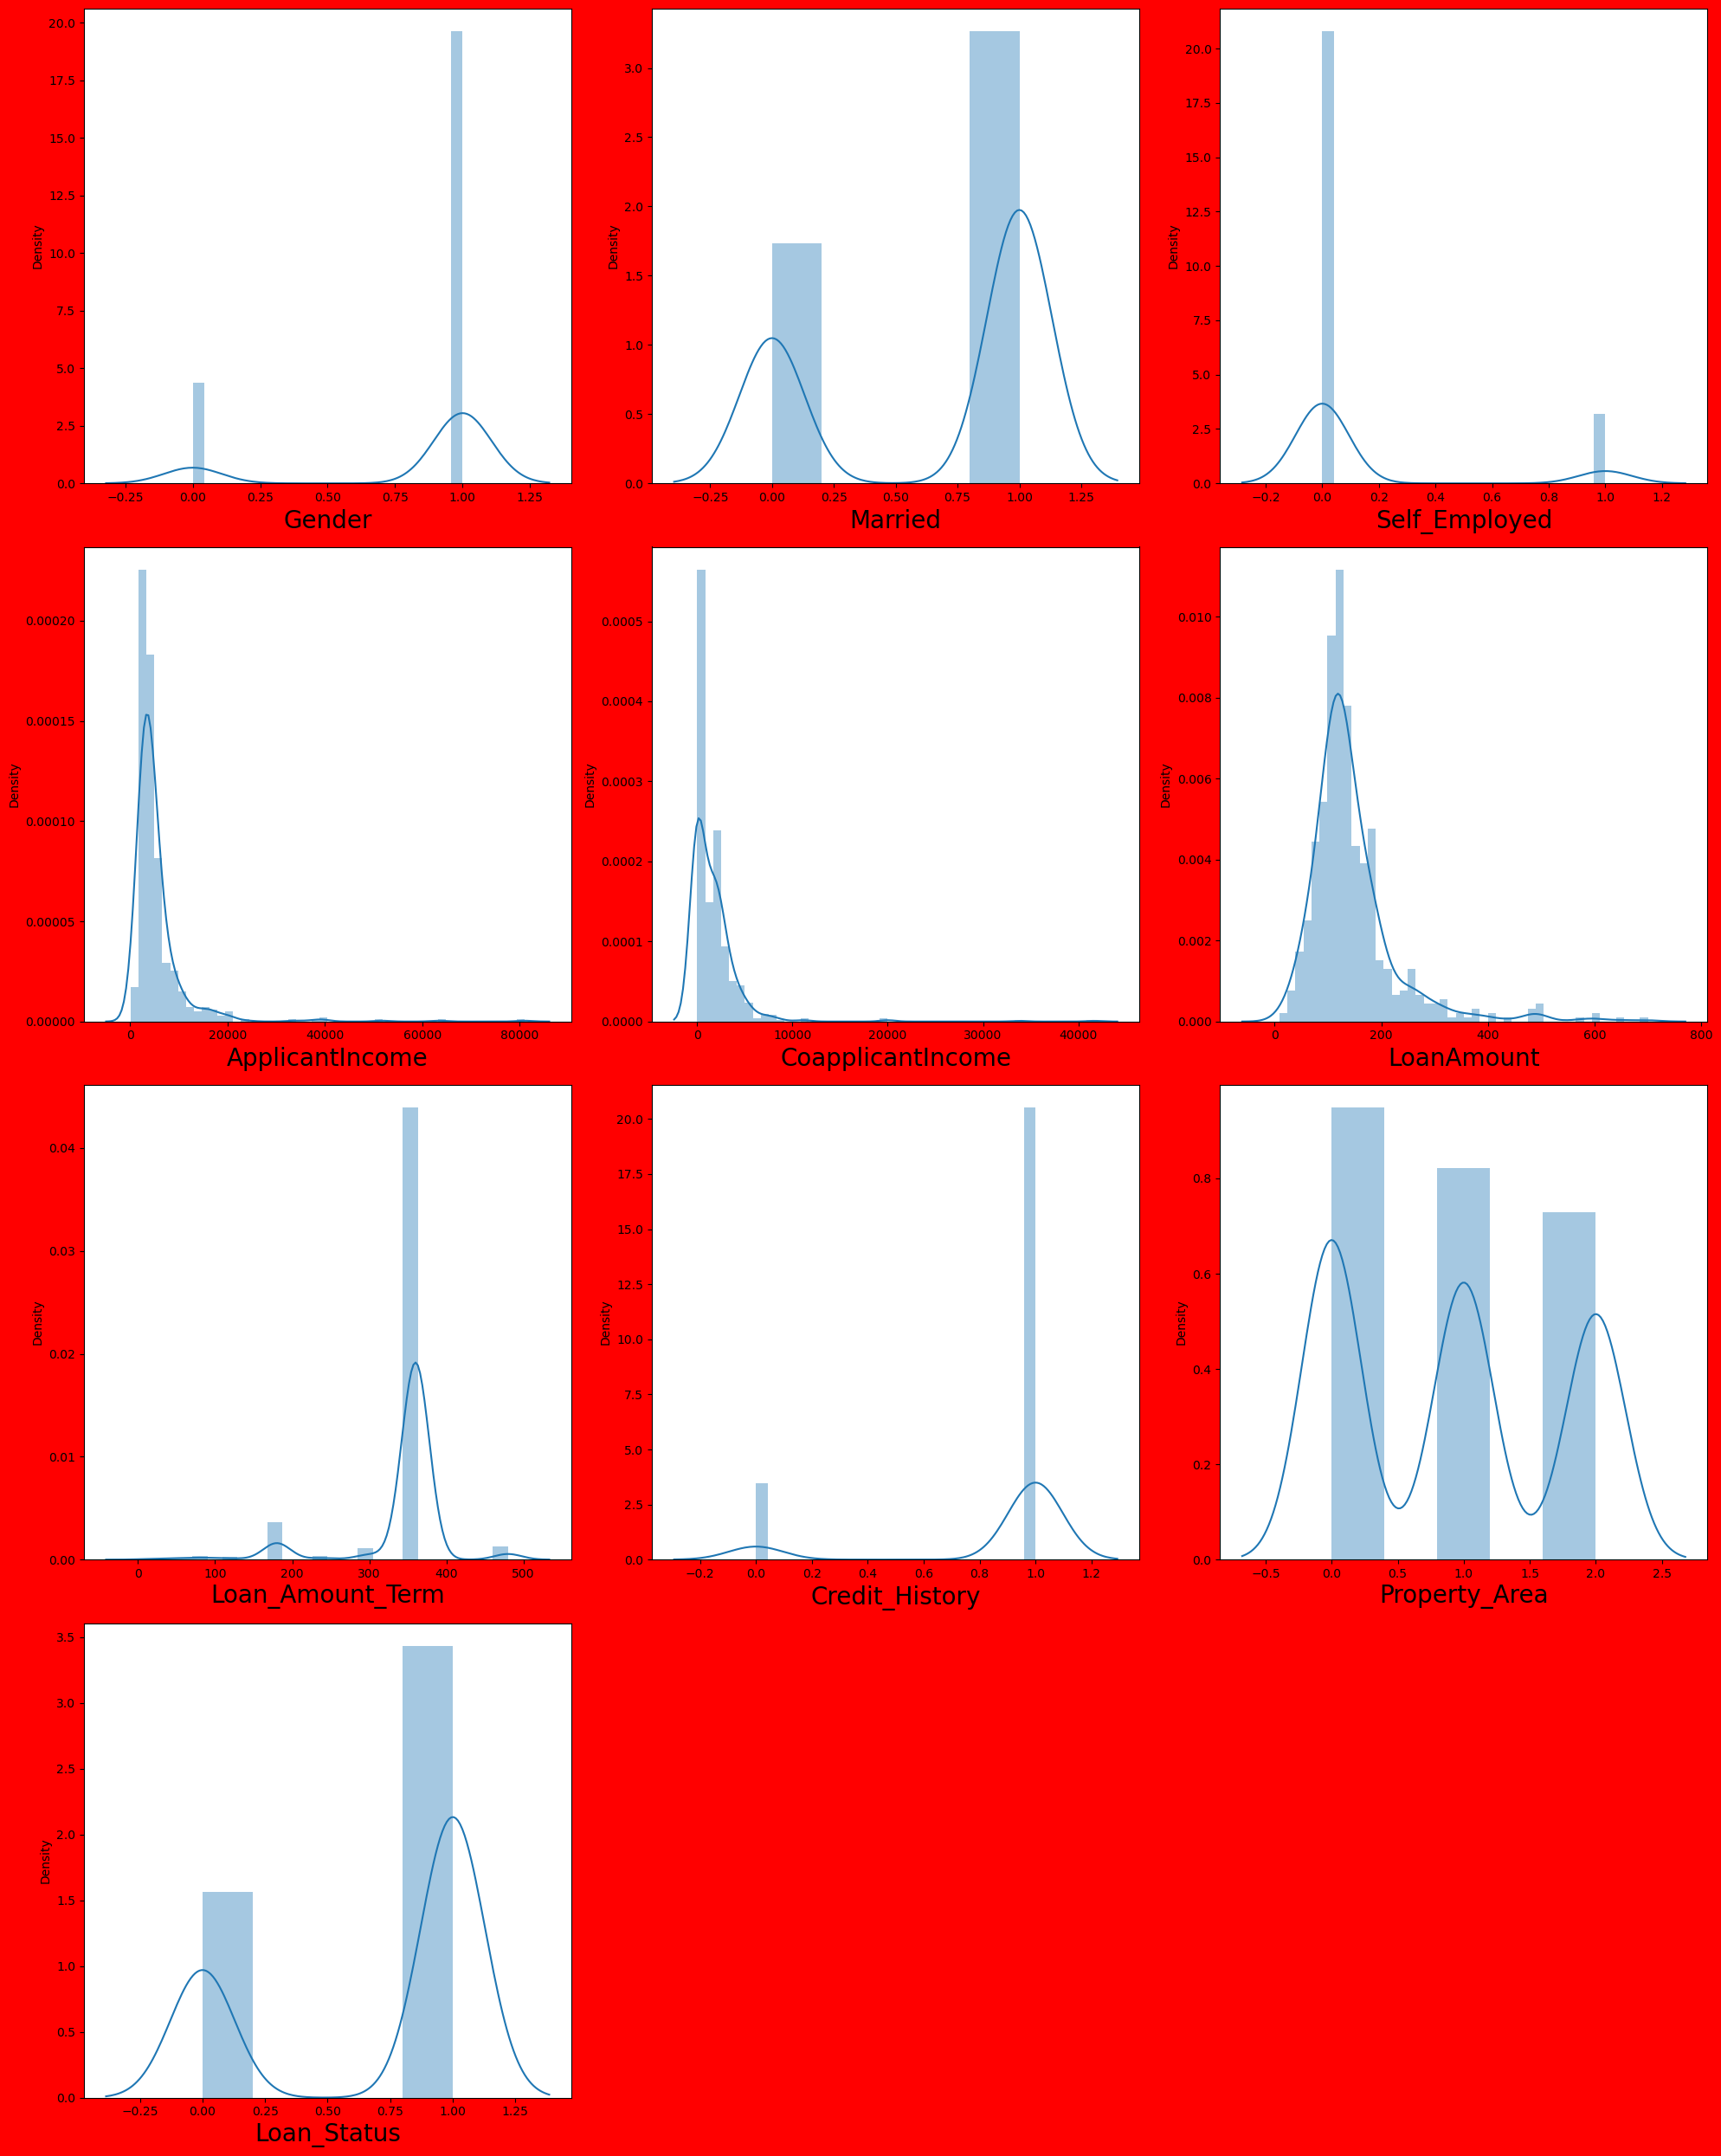

In [154]:
plt.figure(figsize=(20,25),facecolor='red')
plotnum=1
for column in live:
    if plotnum<=11:
        ax= plt.subplot(4,3,plotnum)
        sns.distplot(live[column])
        plt.xlabel(column, fontsize=20)
        
    plotnum+=1
    
plt.tight_layout()

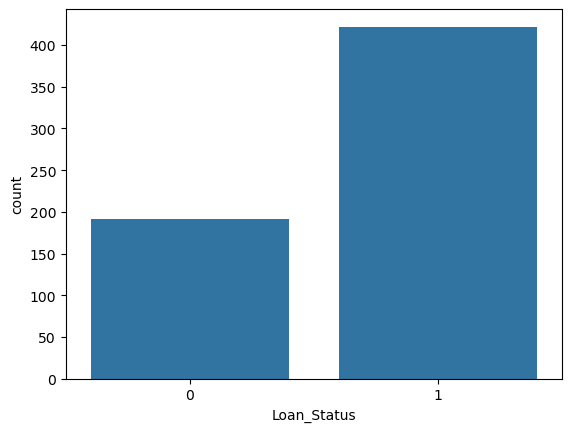

In [155]:
sns.countplot(x='Loan_Status', data=live)
plt.show()

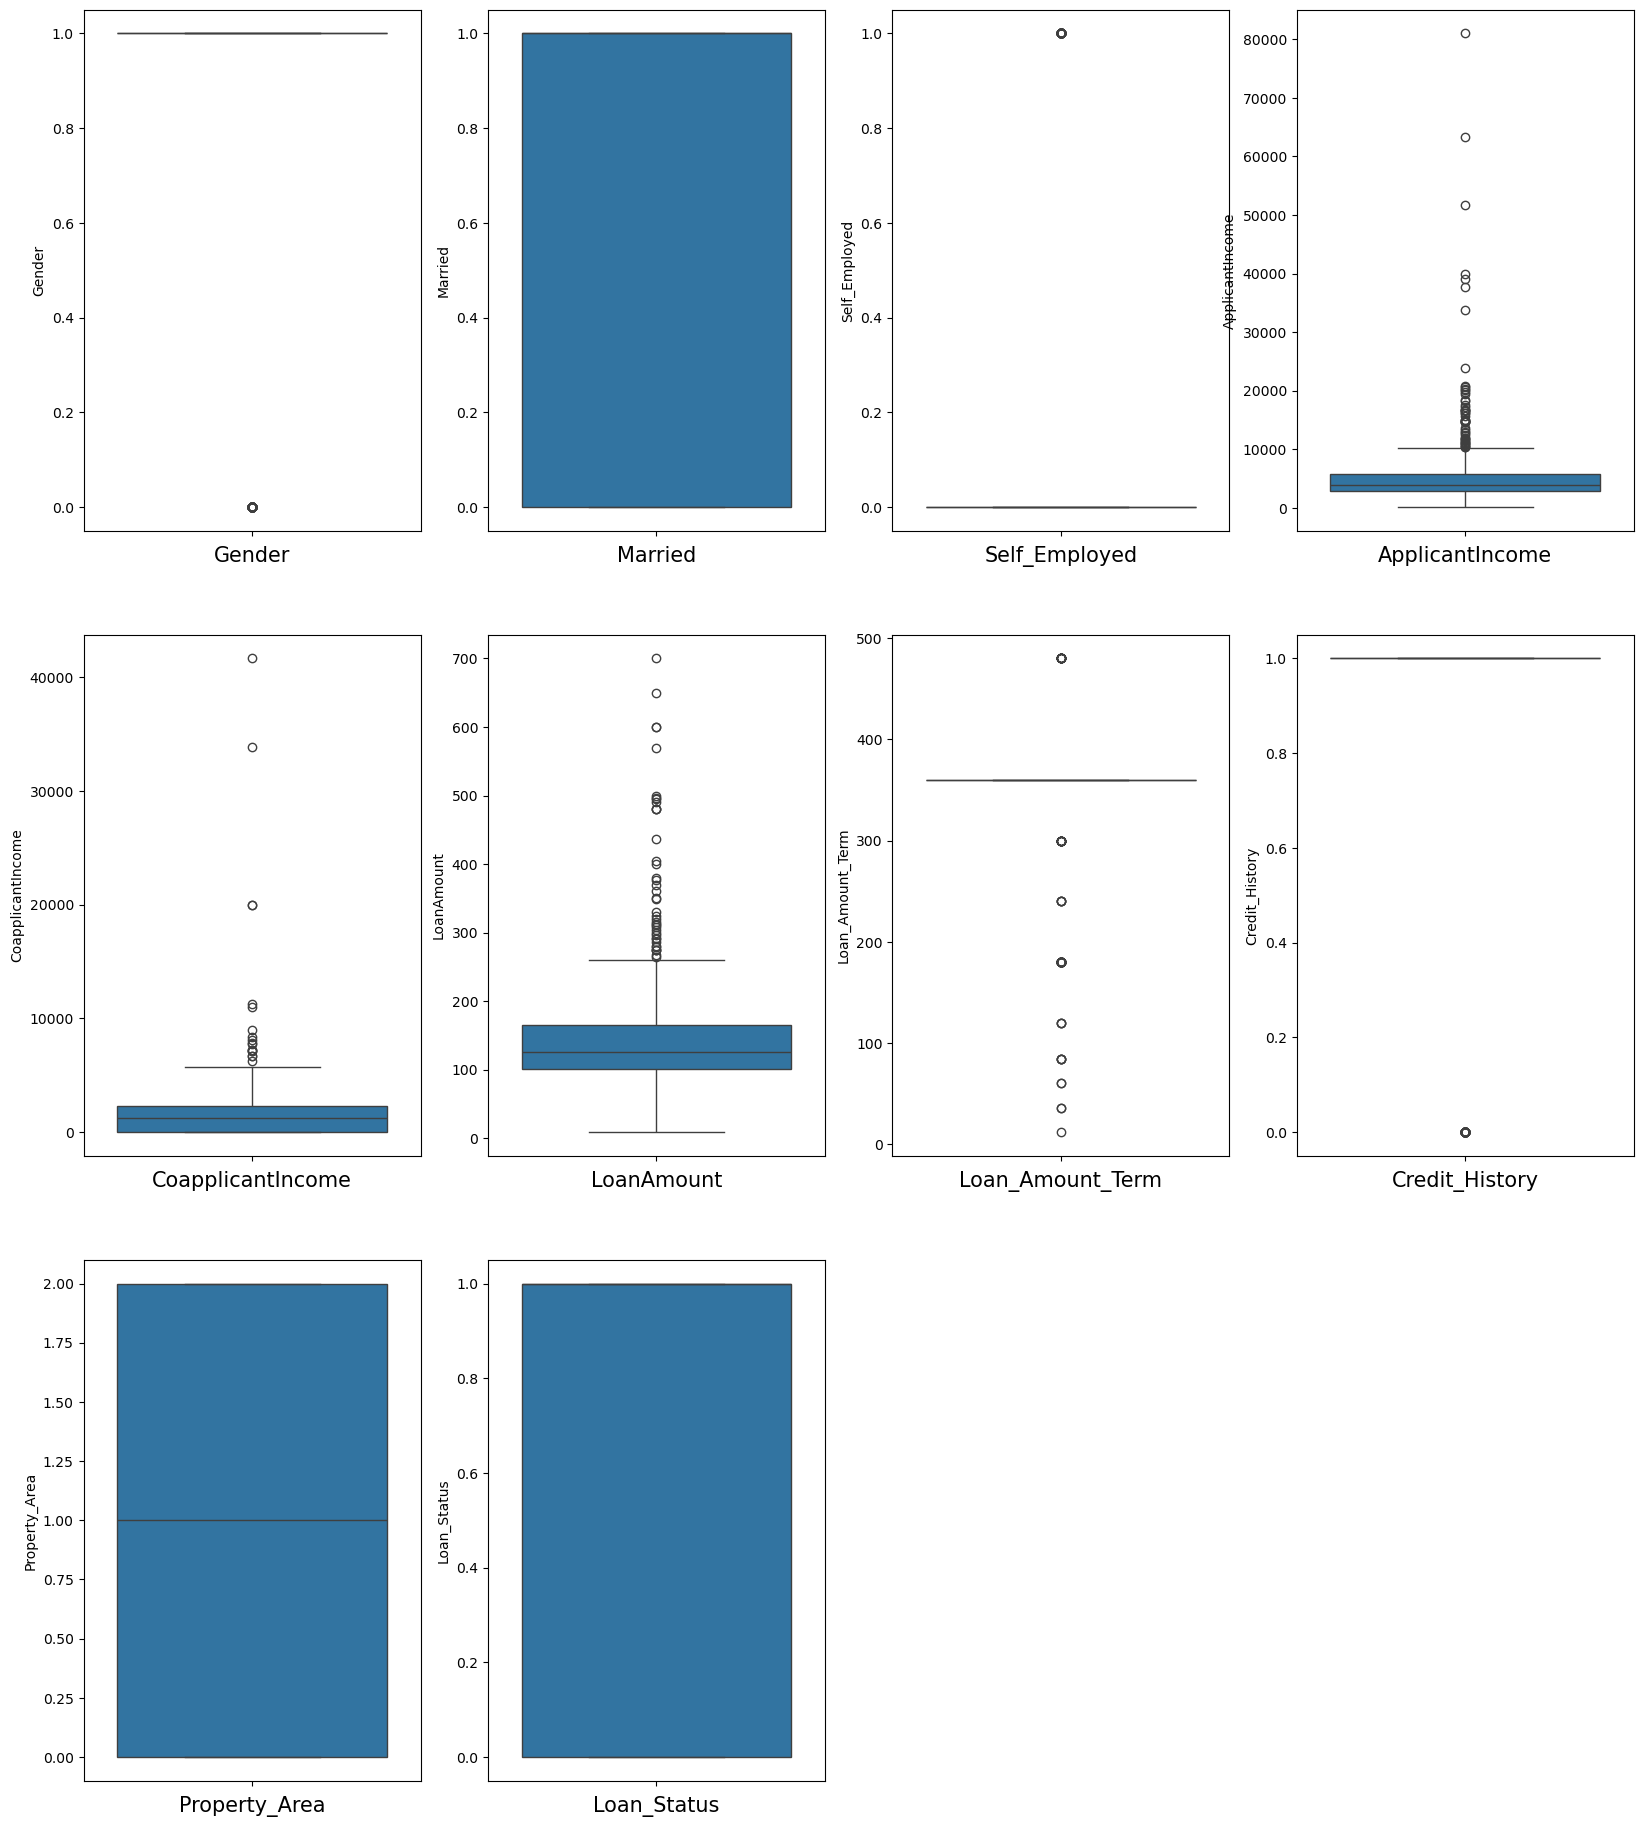

In [156]:
plt.figure(figsize=(20,23))
graph=1
for column in live:
    if graph<=11:
        plt.subplot(3,4,graph)
        ax=sns.boxplot(data=live[column])
        plt.xlabel(column, fontsize=15)
    graph+=1
plt.show()

In [157]:
q1=live.quantile(0.25)
q3=live.quantile(0.75)
iqr= q3-q1

In [158]:
q1

Gender                  1.00
Married                 0.00
Self_Employed           0.00
ApplicantIncome      2877.50
CoapplicantIncome       0.00
LoanAmount            100.25
Loan_Amount_Term      360.00
Credit_History          1.00
Property_Area           0.00
Loan_Status             0.00
Name: 0.25, dtype: float64

In [159]:
incom_high=(q3.ApplicantIncome+(1.5*iqr.ApplicantIncome))
print(incom_high)
index=np.where(live['ApplicantIncome']>incom_high)
live=live.drop(live.index[index])
print(live.shape)
live.reset_index()

10171.25
(564, 10)


,index,Gender,Married,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,0,1,0,0,5849,0.0,120.0,360.0,1.0,1,1
1,1,1,1,0,4583,1508.0,128.0,360.0,1.0,2,0
2,2,1,1,1,3000,0.0,66.0,360.0,1.0,1,1
3,3,1,1,0,2583,2358.0,120.0,360.0,1.0,1,1
4,4,1,0,0,6000,0.0,141.0,360.0,1.0,1,1
...,...,...,...,...,...,...,...,...,...,...,...
559,609,0,0,0,2900,0.0,71.0,360.0,1.0,2,1
560,610,1,1,0,4106,0.0,40.0,180.0,1.0,2,1
561,611,1,1,0,8072,240.0,253.0,360.0,1.0,1,1
562,612,1,1,0,7583,0.0,187.0,360.0,1.0,1,1


In [160]:
capital_high=(q3.CoapplicantIncome+(1.5*iqr.CoapplicantIncome))
print(capital_high)
index=np.where(live['CoapplicantIncome']>capital_high)
live=live.drop(live.index[index])
print(live.shape)
live.reset_index()

5743.125
(548, 10)


,index,Gender,Married,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,0,1,0,0,5849,0.0,120.0,360.0,1.0,1,1
1,1,1,1,0,4583,1508.0,128.0,360.0,1.0,2,0
2,2,1,1,1,3000,0.0,66.0,360.0,1.0,1,1
3,3,1,1,0,2583,2358.0,120.0,360.0,1.0,1,1
4,4,1,0,0,6000,0.0,141.0,360.0,1.0,1,1
...,...,...,...,...,...,...,...,...,...,...,...
543,609,0,0,0,2900,0.0,71.0,360.0,1.0,2,1
544,610,1,1,0,4106,0.0,40.0,180.0,1.0,2,1
545,611,1,1,0,8072,240.0,253.0,360.0,1.0,1,1
546,612,1,1,0,7583,0.0,187.0,360.0,1.0,1,1


In [161]:
loan_high=(q3.LoanAmount+(1.5*iqr.LoanAmount))
print(loan_high)
index=np.where(live['LoanAmount']>loan_high)
live=live.drop(live.index[index])
print(live.shape)
live.reset_index()

261.5
(535, 10)


,index,Gender,Married,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,0,1,0,0,5849,0.0,120.0,360.0,1.0,1,1
1,1,1,1,0,4583,1508.0,128.0,360.0,1.0,2,0
2,2,1,1,1,3000,0.0,66.0,360.0,1.0,1,1
3,3,1,1,0,2583,2358.0,120.0,360.0,1.0,1,1
4,4,1,0,0,6000,0.0,141.0,360.0,1.0,1,1
...,...,...,...,...,...,...,...,...,...,...,...
530,609,0,0,0,2900,0.0,71.0,360.0,1.0,2,1
531,610,1,1,0,4106,0.0,40.0,180.0,1.0,2,1
532,611,1,1,0,8072,240.0,253.0,360.0,1.0,1,1
533,612,1,1,0,7583,0.0,187.0,360.0,1.0,1,1


In [162]:
term_low=(q3.Loan_Amount_Term-(1.5*iqr.Loan_Amount_Term))
print(term_low)
index=np.where(live['Loan_Amount_Term']<term_low)
live=live.drop(live.index[index])
print(live.shape)
live.reset_index()

360.0
(473, 10)


,index,Gender,Married,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,0,1,0,0,5849,0.0,120.0,360.0,1.0,1,1
1,1,1,1,0,4583,1508.0,128.0,360.0,1.0,2,0
2,2,1,1,1,3000,0.0,66.0,360.0,1.0,1,1
3,3,1,1,0,2583,2358.0,120.0,360.0,1.0,1,1
4,4,1,0,0,6000,0.0,141.0,360.0,1.0,1,1
...,...,...,...,...,...,...,...,...,...,...,...
468,608,1,1,0,3232,1950.0,108.0,360.0,1.0,2,1
469,609,0,0,0,2900,0.0,71.0,360.0,1.0,2,1
470,611,1,1,0,8072,240.0,253.0,360.0,1.0,1,1
471,612,1,1,0,7583,0.0,187.0,360.0,1.0,1,1


In [163]:
gender_low=(q3.Gender-(1.5*iqr.Gender))
print(gender_low)
index=np.where(live['Gender']<gender_low)
live=live.drop(live.index[index])
print(live.shape)
live.reset_index()

1.0
(379, 10)


,index,Gender,Married,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,0,1,0,0,5849,0.0,120.0,360.0,1.0,1,1
1,1,1,1,0,4583,1508.0,128.0,360.0,1.0,2,0
2,2,1,1,1,3000,0.0,66.0,360.0,1.0,1,1
3,3,1,1,0,2583,2358.0,120.0,360.0,1.0,1,1
4,4,1,0,0,6000,0.0,141.0,360.0,1.0,1,1
...,...,...,...,...,...,...,...,...,...,...,...
374,606,1,1,0,3400,2500.0,173.0,360.0,1.0,0,1
375,607,1,1,0,3987,1411.0,157.0,360.0,1.0,2,1
376,608,1,1,0,3232,1950.0,108.0,360.0,1.0,2,1
377,611,1,1,0,8072,240.0,253.0,360.0,1.0,1,1


In [164]:
live.describe()

,Gender,Married,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
count,379.0,379.000000,379.000000,379.000000,379.000000,379.000000,379.000000,379.000000,379.000000,379.000000
mean,1.0,0.728232,0.110818,4096.897098,1475.121689,131.833773,363.166227,0.862797,0.949868,0.712401
std,0.0,0.445459,0.314322,1846.015841,1419.442696,43.833938,19.258787,0.344517,0.832615,0.453241
min,1.0,0.000000,0.000000,150.000000,0.000000,26.000000,360.000000,0.000000,0.000000,0.000000
25%,1.0,0.000000,0.000000,2759.000000,0.000000,104.000000,360.000000,1.000000,0.000000,0.000000
50%,1.0,1.000000,0.000000,3660.000000,1516.000000,125.000000,360.000000,1.000000,1.000000,1.000000
75%,1.0,1.000000,0.000000,5083.000000,2291.500000,158.500000,360.000000,1.000000,2.000000,1.000000
max,1.0,1.000000,1.000000,10139.000000,5625.000000,260.000000,480.000000,1.000000,2.000000,1.000000


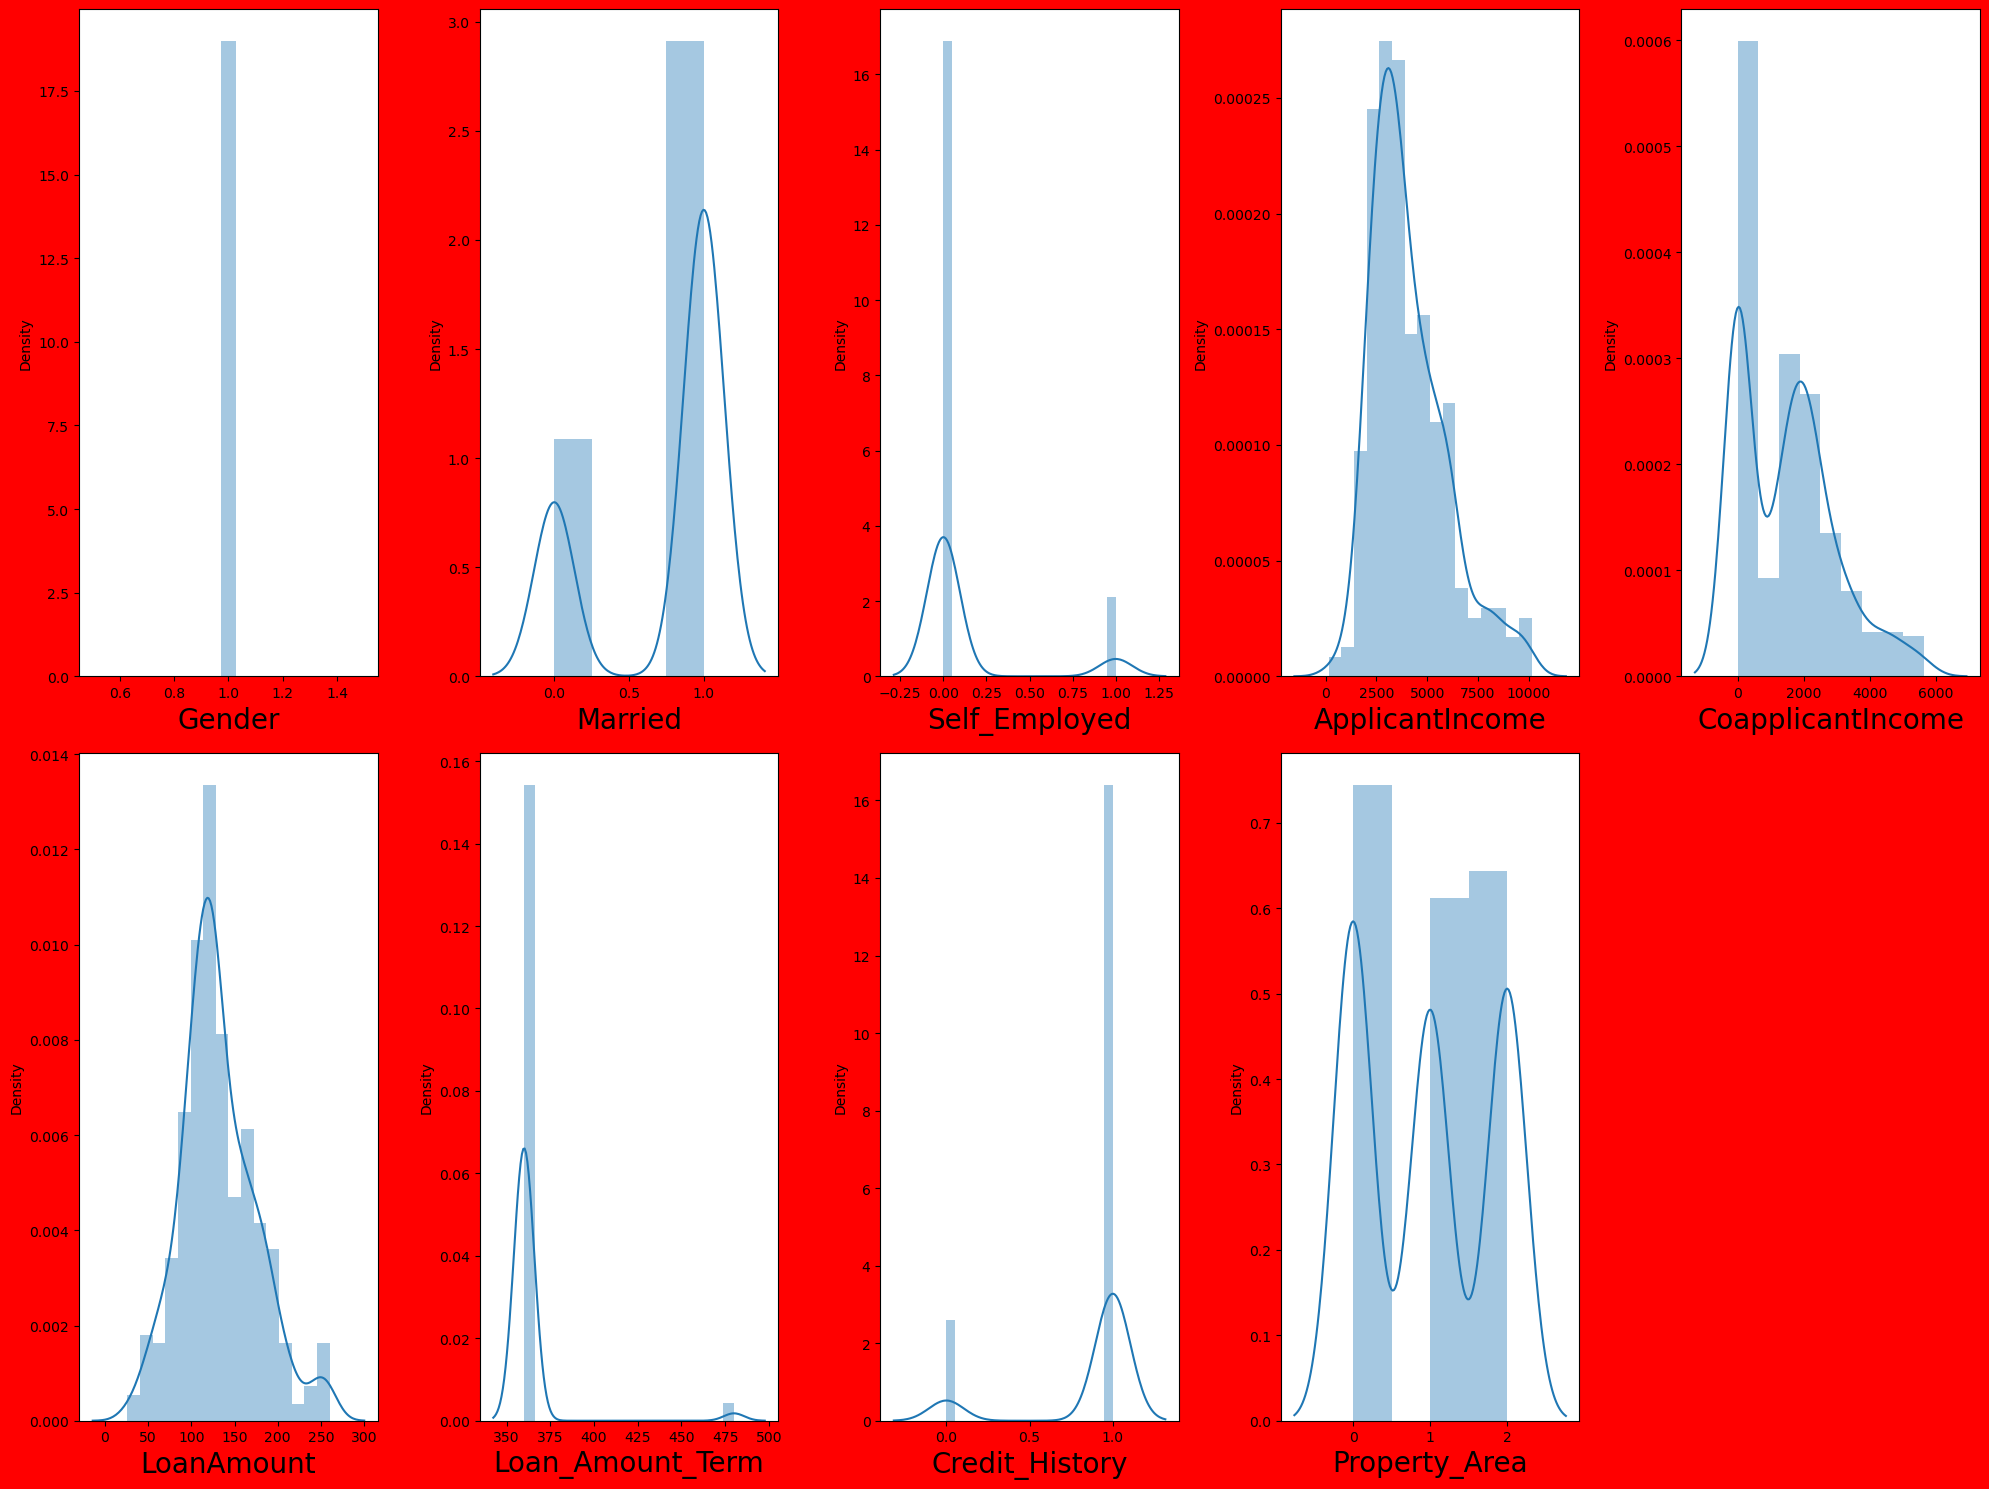

In [165]:
plt.figure(figsize=(20,15),facecolor='red')
plotnum=1
for column in live:
    if plotnum<=9:
        ax= plt.subplot(2,5,plotnum)
        sns.distplot(live[column])
        plt.xlabel(column, fontsize=20)
        
    plotnum+=1
    
plt.tight_layout()

In [166]:
### finding relationship(features vs label)
X= live.drop(columns=['Loan_Status'])
y= live['Loan_Status']

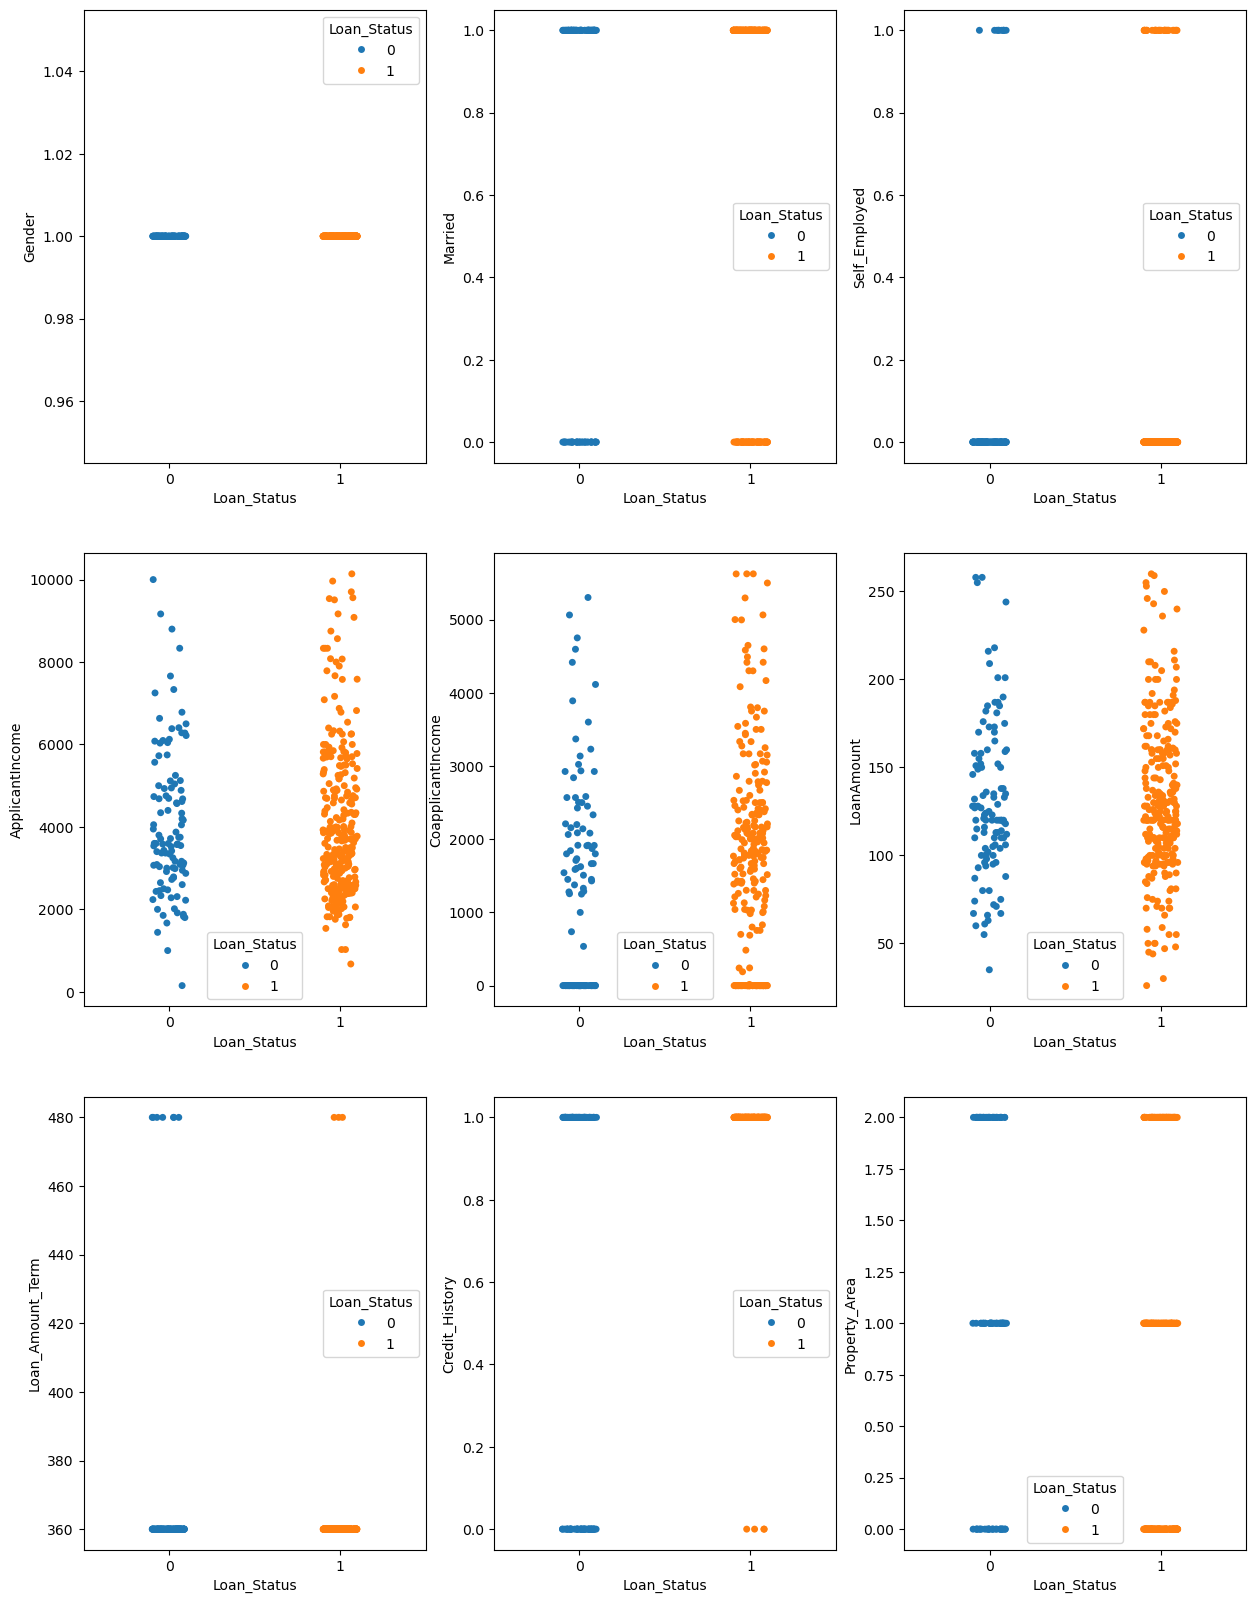

In [167]:
plt.figure(figsize=(15,20))
plotnumber = 1
for column in X:
    if plotnumber <=9:
        ax = plt.subplot(3,3, plotnumber)
        sns.stripplot(x=y, y=X[column],hue=y)
    plotnumber+=1
plt.show()

In [168]:
df_live= live.drop('Loan_Status', axis=1)

In [169]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_scaler = scaler.fit_transform(X)

In [170]:
x_train, y_train, x_test, y_test= train_test_split(X_scaler,y,test_size=0.25, random_state=355)


In [171]:
# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=428)

In [172]:
# Train the model
# Create the model
model = LogisticRegression()
model.fit(X_train, y_train)

LogisticRegression()

In [173]:
# Evaluate the model
score = model.score(X_test, y_test)
print('The score of the model is:', score)

The score of the model is: 0.7684210526315789


In [174]:
model.score(x_train,y_train)

0.6126760563380281

In [177]:
model.score(X_test,y_test)

0.7684210526315789

In [179]:
y_pred=model.predict(X_test)

In [181]:
from sklearn.metrics import  mean_squared_error, mean_absolute_error


In [185]:
y_pred=model.predict(X_test)

In [186]:
mean_absolute_error(y_test,y_pred)

0.23157894736842105

In [188]:
mean_squared_error(y_test,y_pred)

0.23157894736842105

In [189]:
np.sqrt(mean_squared_error(y_test,y_pred))


0.4812265031857878

In [190]:
from sklearn.linear_model import Ridge,Lasso,RidgeCV,LassoCV


In [191]:
lasscv=LassoCV(alphas= None, max_iter=10)
lasscv.fit(x_train, y_train)

LassoCV(max_iter=10)

In [193]:
alpha=lasscv.alpha_
alpha

0.03548569316684554

In [194]:
lass_reg=Lasso(alpha)
lass_reg.fit(x_train, y_train)

Lasso(alpha=0.03548569316684554)

In [196]:
lass_reg.score(X_test, y_test)

-0.03829471644951221